In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kaggle-survey-2017-2022-long-format/kaggle_survey_answer_2017_2022.csv
/kaggle/input/kaggle-survey-2017-2022-long-format/kaggle_survey_question_2017_2022.csv
/kaggle/input/kaggle-survey-2017-2022-long-format/kaggle_survey_choice_2017_2022.csv


In [2]:
import pandas as pd

# Define the path of the first CSV file
csv_file_path_1 = os.path.join( '/kaggle/input/kaggle-survey-2017-2022-long-format/kaggle_survey_question_2017_2022.csv')

# Load the CSV file into a DataFrame
df_question = pd.read_csv(csv_file_path_1)

# Display the first few rows of the DataFrame
df_question.head()


,Unnamed: 0,question_id,survey_year,question_number,question_content
0,0,2022Q1,2022,1,Duration (in seconds)
1,1,2022Q2,2022,2,What is your age (# years)?
2,2,2022Q3,2022,3,What is your gender? - Selected Choice
3,3,2022Q4,2022,4,In which country do you currently reside?
4,4,2022Q5,2022,5,"Are you currently a student? (high school, uni..."


In [3]:
# Define the path of the second CSV file
csv_file_path_2 = os.path.join( '/kaggle/input/kaggle-survey-2017-2022-long-format/kaggle_survey_answer_2017_2022.csv')

# Load the CSV file into a DataFrame
df_answer = pd.read_csv(csv_file_path_2)

# Display the first few rows of the DataFrame
df_answer.head()


/tmp/ipykernel_20/2652125481.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_answer = pd.read_csv(csv_file_path_2)


,Unnamed: 0,year,anwser_id,answer_time_spent,question_number,choice_content
0,0,2022.0,2022A000001,121.0,1.0,121
1,1,2022.0,2022A000002,462.0,1.0,462
2,2,2022.0,2022A000003,293.0,1.0,293
3,3,2022.0,2022A000004,851.0,1.0,851
4,4,2022.0,2022A000005,232.0,1.0,232


In [4]:
# Get general information about the df_question DataFrame
df_question.info()

# Count the number of questions per survey year
df_question['survey_year'].value_counts().sort_index()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        442 non-null    int64 
 1   question_id       442 non-null    object
 2   survey_year       442 non-null    int64 
 3   question_number   442 non-null    int64 
 4   question_content  442 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.4+ KB


2017    233
2018     50
2019     34
2020     39
2021     42
2022     44
Name: survey_year, dtype: int64

In [5]:
# Get general information about the df_answer DataFrame
df_answer.info()

# Count the number of answers per year
df_answer_year_counts = df_answer['year'].value_counts().sort_index()

# Calculate the summary statistics for answer_time_spent
df_answer_time_stats = df_answer['answer_time_spent'].describe()

df_answer_year_counts, df_answer_time_stats


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6405575 entries, 0 to 6405574
Data columns (total 6 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         object 
 1   year               float64
 2   anwser_id          object 
 3   answer_time_spent  float64
 4   question_number    float64
 5   choice_content     object 
dtypes: float64(3), object(3)
memory usage: 293.2+ MB


(2017.0    1033266
 2018.0    1640907
 2019.0     782291
 2020.0     860859
 2021.0    1229770
 2022.0     858429
 Name: year, dtype: int64,
 count    5.372256e+06
 mean     1.125246e+04
 std      7.787352e+04
 min      1.600000e+01
 25%      5.040000e+02
 50%      7.900000e+02
 75%      1.361000e+03
 max      2.533678e+06
 Name: answer_time_spent, dtype: float64)

In [6]:
# Randomly select 10 questions from the df_question DataFrame
df_question.sample(10)


,Unnamed: 0,question_id,survey_year,question_number,question_content
200,41,2018Q42,2018,42,What metrics do you or your organization use t...
370,161,2017Q162,2017,162,"At work, how often do you use the following da..."
399,190,2017Q191,2017,191,"At work, how often did you experience these ba..."
189,30,2018Q31,2018,31,Which types of data do you currently interact ...
371,162,2017Q163,2017,163,"At work, how often do you use the following da..."
203,44,2018Q45,2018,45,In what circumstances would you explore model ...
402,193,2017Q194,2017,194,"At work, how often did you experience these ba..."
98,12,2020Q13,2020,13,Approximately how many times have you used a T...
60,16,2021Q17,2021,17,Which of the following ML algorithms do you us...
303,94,2017Q95,2017,95,"At work, how often did you use the following d..."


In [7]:
# Count the number of answers per question_number
df_answer_question_counts = df_answer['question_number'].value_counts().sort_values(ascending=False)

# Display the 10 most answered questions
df_answer_question_counts.head(10)


12.0    303160
14.0    268706
13.0    229129
16.0    221227
7.0     214243
17.0    189050
34.0    178827
9.0     175734
31.0    140763
18.0    140162
Name: question_number, dtype: int64

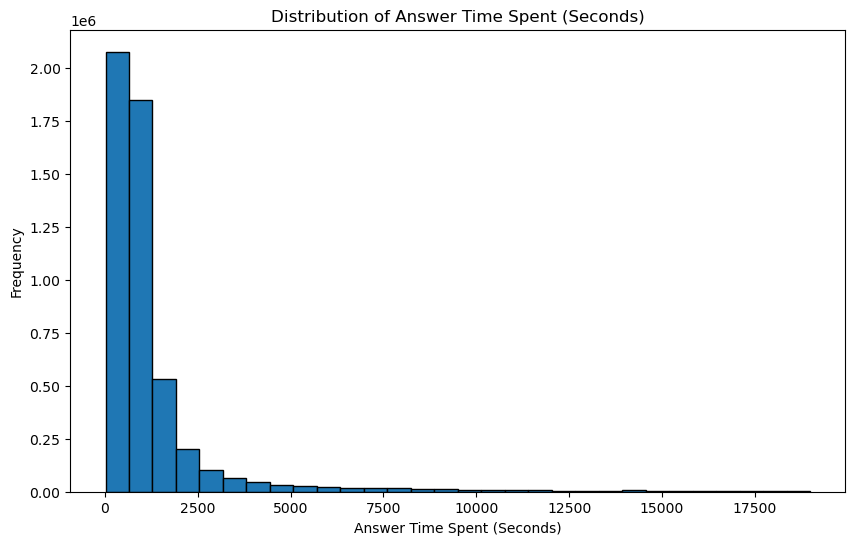

In [8]:
import matplotlib.pyplot as plt

# Calculate the 95th percentile of answer_time_spent
percentile_95 = df_answer['answer_time_spent'].quantile(0.95)

# Create a histogram of answer_time_spent values below the 95th percentile
plt.figure(figsize=(10, 6))
plt.hist(df_answer[df_answer['answer_time_spent'] < percentile_95]['answer_time_spent'], bins=30, edgecolor='black')
plt.title('Distribution of Answer Time Spent (Seconds)')
plt.xlabel('Answer Time Spent (Seconds)')
plt.ylabel('Frequency')
plt.show()


In [9]:
# Count the number of occurrences of each choice_content
df_answer_choice_counts = df_answer['choice_content'].value_counts()

# Display the 10 most common choice_content
df_answer_choice_counts.head(10)


None                                             212753
-1                                               209784
Python                                           161498
0.0                                              102969
Other                                             98667
Random Structured Forests for crack detection     96298
Man                                               54653
 Matplotlib                                       54463
Male                                              49178
Coursera                                          48825
Name: choice_content, dtype: int64

In [10]:
# Filter the DataFrame for rows where choice_content is "Python"
df_python = df_answer[df_answer['choice_content'] == 'Python']

# Count the number of "Python" responses per year
df_python_year_counts = df_python['year'].value_counts().sort_index()

df_python_year_counts


2017.0     8772
2018.0    38072
2019.0    24157
2020.0    29771
2021.0    42073
2022.0    18653
Name: year, dtype: int64

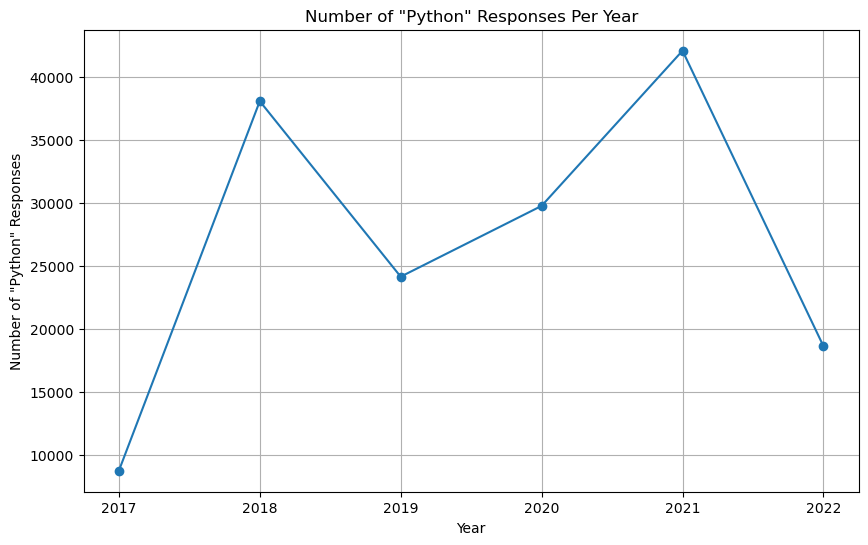

In [11]:
# Plot the number of "Python" responses per year
plt.figure(figsize=(10, 6))
plt.plot(df_python_year_counts.index, df_python_year_counts.values, marker='o')
plt.title('Number of "Python" Responses Per Year')
plt.xlabel('Year')
plt.ylabel('Number of "Python" Responses')
plt.xticks(ticks=df_python_year_counts.index, labels=df_python_year_counts.index.astype(int))
plt.grid(True)
plt.show()


In [12]:
# Calculate the average answer_time_spent per year
df_answer_time_by_year = df_answer.groupby('year')['answer_time_spent'].mean()

df_answer_time_by_year


year
2017.0             NaN
2018.0    12721.391831
2019.0    14038.593823
2020.0     9238.305634
2021.0    10419.543153
2022.0     9118.652447
Name: answer_time_spent, dtype: float64

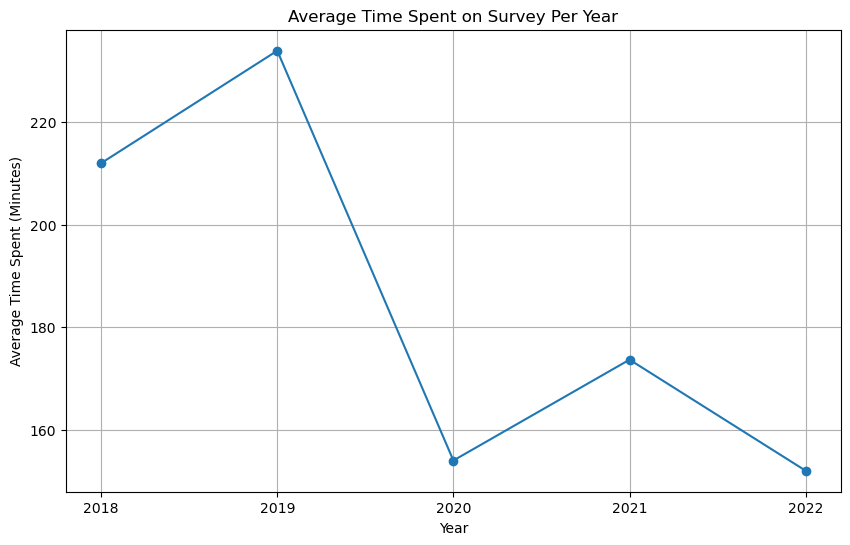

In [13]:
# Plot the average answer_time_spent per year
plt.figure(figsize=(10, 6))
plt.plot(df_answer_time_by_year.index, df_answer_time_by_year.values / 60, marker='o')  # Convert seconds to minutes
plt.title('Average Time Spent on Survey Per Year')
plt.xlabel('Year')
plt.ylabel('Average Time Spent (Minutes)')
plt.xticks(ticks=df_answer_time_by_year.index[1:], labels=df_answer_time_by_year.index[1:].astype(int))  # Exclude 2017
plt.grid(True)
plt.show()


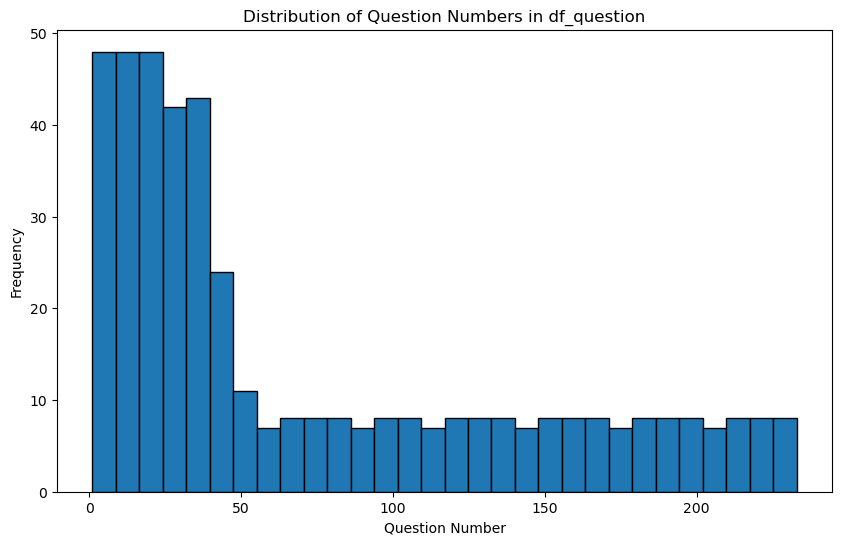

In [14]:
# Plot a histogram of the question_number column in the df_question DataFrame
plt.figure(figsize=(10, 6))
plt.hist(df_question['question_number'], bins=30, edgecolor='black')
plt.title('Distribution of Question Numbers in df_question')
plt.xlabel('Question Number')
plt.ylabel('Frequency')
plt.show()


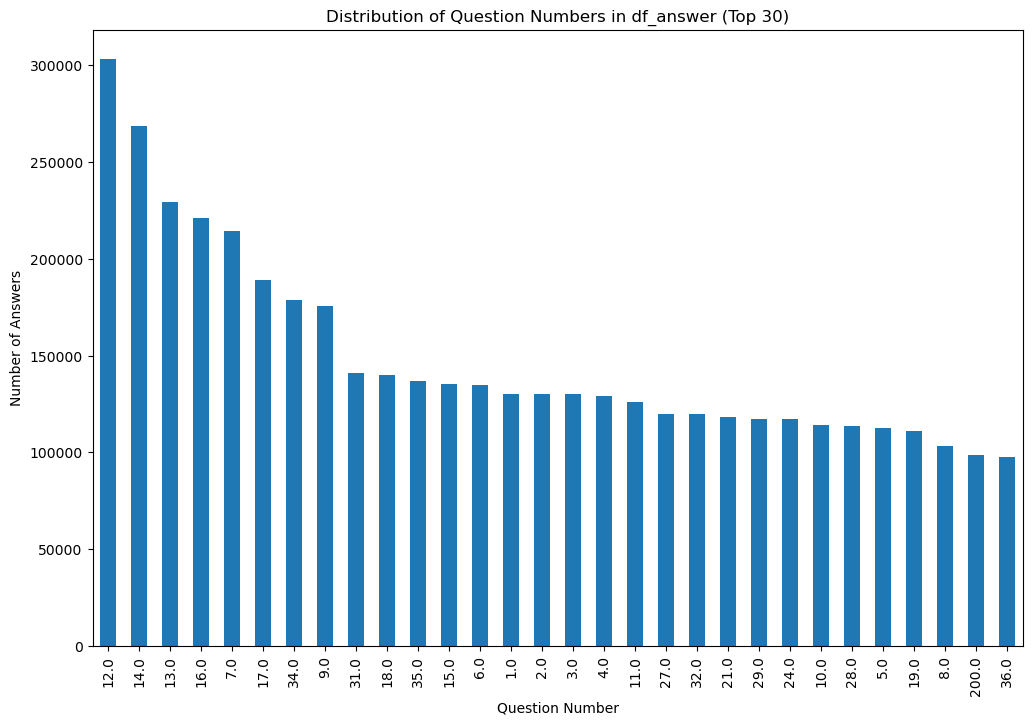

In [15]:
# Count the number of answers per question_number
df_answer_question_counts = df_answer['question_number'].value_counts()

# Plot a bar chart of the 30 most answered question numbers
plt.figure(figsize=(12, 8))
df_answer_question_counts.head(30).plot(kind='bar')
plt.title('Distribution of Question Numbers in df_answer (Top 30)')
plt.xlabel('Question Number')
plt.ylabel('Number of Answers')
plt.show()


In [16]:
# Count the number of each choice_content per year
df_answer_choice_content_counts_by_year = df_answer.groupby('year')['choice_content'].value_counts()

# Display the most common choice_content across years
df_answer_choice_content_counts_by_year.groupby('year').head(5)


year    choice_content                               
2017.0  Random Structured Forests for crack detection     96298
        0.0                                               49854
        Often                                             44830
        Sometimes                                         43730
        Most of the time                                  41251
2018.0  -1                                               125692
        0.0                                               53115
        Python                                            38072
        None                                              30849
        10.0                                              30243
2019.0  -1                                                84091
        None                                              42081
        Python                                            24157
        Male                                              16138
        Other                                     

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


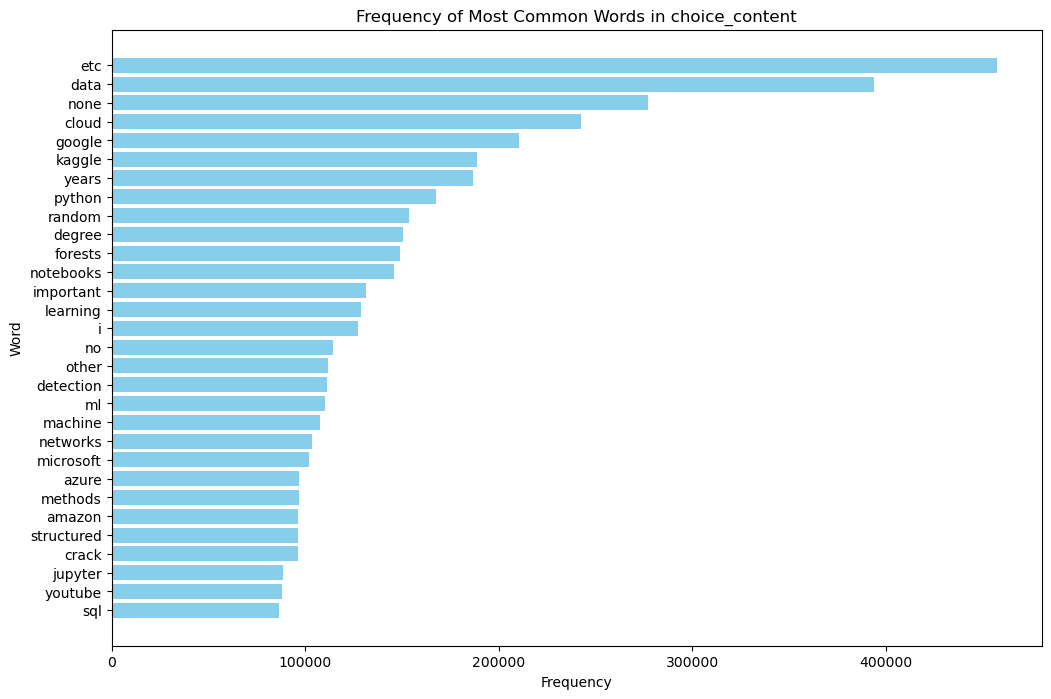

In [17]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download the set of stop words the first time
nltk.download('punkt')
nltk.download('stopwords')

# Define the set of stop words
stop_words = set(stopwords.words('english'))

# Concatenate all choice_content into one string
all_choice_content = df_answer['choice_content'].str.cat(sep=' ')

# Tokenize the string into words
words = word_tokenize(all_choice_content)

# Remove stop words and non-alphabetic tokens, and convert to lower case
filtered_words = [word.lower() for word in words if word.isalpha() and word not in stop_words]

# Count the frequency of each word
word_freq = Counter(filtered_words)

# Get the 30 most common words
common_words = word_freq.most_common(30)

# Convert the list of tuples into a DataFrame
df_common_words = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

# Plot the frequencies of the most common words
plt.figure(figsize=(12, 8))
plt.barh(df_common_words['Word'], df_common_words['Frequency'], color='skyblue')
plt.gca().invert_yaxis()  # Invert the y-axis to display the most common word at the top
plt.title('Frequency of Most Common Words in choice_content')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()


In [18]:
# Calculate the number of unique choice_content per year
df_answer_unique_choices_by_year = df_answer.groupby('year')['choice_content'].nunique()

df_answer_unique_choices_by_year


year
2017.0    34499
2018.0     4134
2019.0     3171
2020.0      364
2021.0      407
2022.0     3944
Name: choice_content, dtype: int64

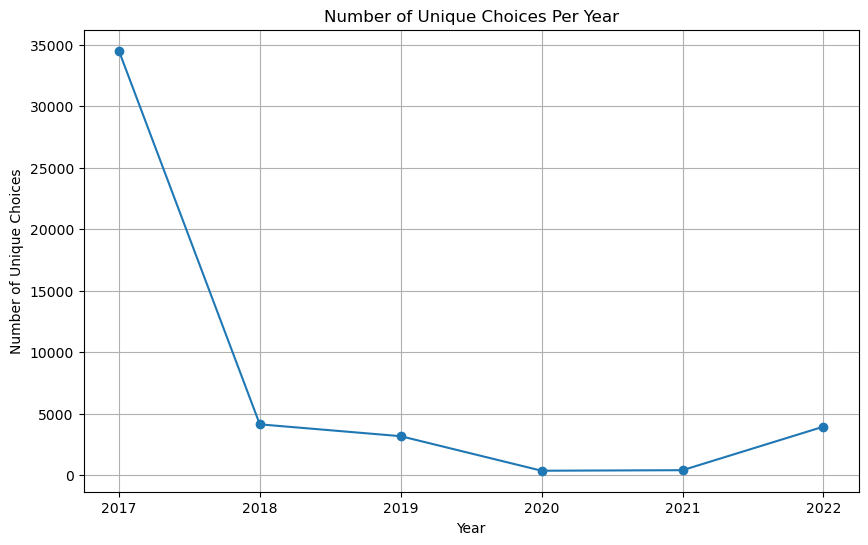

In [19]:
# Plot the number of unique choices per year
plt.figure(figsize=(10, 6))
plt.plot(df_answer_unique_choices_by_year.index, df_answer_unique_choices_by_year.values, marker='o')
plt.title('Number of Unique Choices Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Unique Choices')
plt.xticks(ticks=df_answer_unique_choices_by_year.index, labels=df_answer_unique_choices_by_year.index.astype(int))
plt.grid(True)
plt.show()
